In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr

In [3]:
data = pd.read_csv("../Baselines/ranks_features.csv")
data.head()

,id,questionage,label,decision_time,num_words,num_hyperlinks,GunningFogIndex,LIX,cumulative_term_entropy,number_posts,...,accepted_answers_u,accumulated_score_x_u,accumulated_score_y_u,num_solved_questions_u,reputation_u,topic_affinity_user,topic_affinity_asker,topic_reputation_user,topic_reputation_asker,rank
0,131092,0.037315,1,4876600,63,0,13.973709,39.159624,4.592328,5,...,15.0,0.0,201.0,0.0,0.0,3.385784e-04,0.001465,14,0,1
1,131054,0.519294,1,4876601,45,0,10.698829,31.665105,4.174281,1,...,15.0,0.0,201.0,0.0,0.0,8.464459e-05,0.037037,10,0,5
2,131312,0.118056,1,4876602,1039,0,7.043462,24.520102,9.620359,5,...,15.0,0.0,201.0,0.0,0.0,2.556380e-06,0.000104,10,4,6
3,131482,0.490174,1,4876603,163,0,29.676723,82.013035,6.454892,5,...,15.0,0.0,201.0,0.0,0.0,4.057747e-09,0.000052,0,0,11
4,132635,0.746528,1,4876604,46,0,17.445902,43.614754,3.984624,1,...,15.0,0.0,201.0,0.0,0.0,4.232230e-04,0.037037,10,0,8


In [18]:
corrs = []
cols = np.asarray(data.columns[:-1])
for col in data.columns[:-1]:
    r, _ = pearsonr(data[col], data["rank"])
    # print(col, r)
    corrs.append(r)
sorted_corrs = np.flip(np.argsort(np.abs(corrs)))
sorted_cols = cols[sorted_corrs]
sorted_corrs = np.asarray(corrs)[sorted_corrs]
for i in range(len(sorted_corrs)):
    print(sorted_cols[i], sorted_corrs[i])

label nan
questionage 0.24477636465884908
cumulative_term_entropy 0.22226408556784175
num_words 0.16228568685264297
topic_reputation_user -0.1160416419704208
reputation_u 0.08645603039328376
topic_affinity_asker -0.060190108028558745
id -0.04538050624392047
LIX 0.04484246705199638
reputation 0.04380024562798034
GunningFogIndex 0.04192233589536486
accumulated_score_x -0.041570728913730204
decision_time -0.040812848847989906
num_questions -0.040473377606387716
accepted_answers_u -0.03477686428935438
num_questions_u -0.033568750482403195
accumulated_score_x_u -0.03078304189607282
num_solved_questions -0.03039223518038257
number_posts -0.0296121692806122
accumulated_score_y_u 0.022831648395395317
topic_affinity_user 0.0211853213863308
number_posts_u 0.02083211125814862
accumulated_score_y -0.020030324045822386
accepted_answers -0.017629003659976487
number_answers -0.017351662076984013
num_hyperlinks -0.011353779363387176
num_solved_questions_u 0.009160533665302745
topic_reputation_asker -0

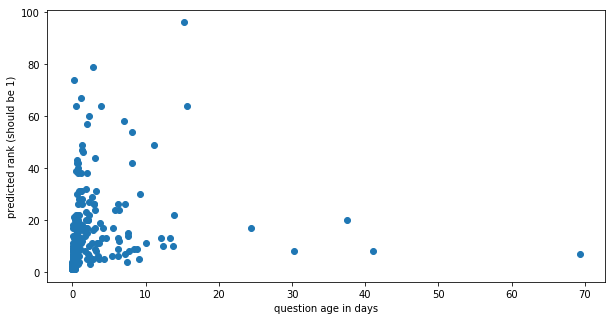

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(data["questionage"], data["rank"])
plt.xlabel("question age in days")
plt.ylabel("predicted rank (should be 1)")
plt.show()

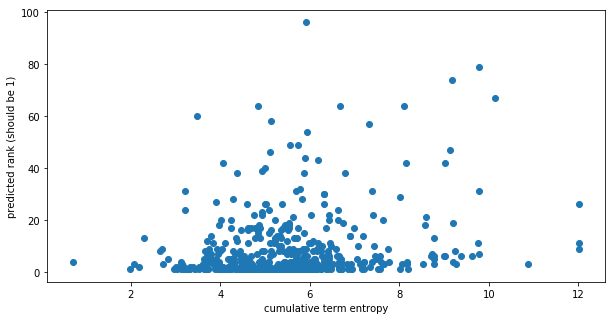

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(data["cumulative_term_entropy"], data["rank"])
plt.xlabel("cumulative term entropy")
plt.ylabel("predicted rank (should be 1)")
plt.show()

In [15]:
for i in range(len(data)):
    if data["rank"][i]>10:
        print(data["questionage"][i], data["rank"][i])

0.4901736111111111 11
1.081273148148148 13
3.32775462962963 11
1.3343402777777778 49
3.5915740740740736 11
1.3003935185185185 18
5.5237847222222225 17
1.8069097222222217 17
0.4036689814814815 14
0.25167824074074074 21
0.6275347222222222 15
0.3667476851851852 20
2.69125 11
1.2253125 31
0.6409837962962963 17
1.0973611111111108 31
1.4389120370370367 16
3.255335648148148 31
2.7780439814814812 16
4.046840277777778 13
5.866828703703702 24
6.382453703703702 12
1.3451851851851853 12
1.0322916666666666 18
2.1505439814814813 20
4.236064814814815 17
1.2226736111111112 12
1.2496875 28
2.936377314814815 26
10.075532407407408 11
13.316608796296293 13
6.414502314814817 24
0.5142939814814815 22
0.08398148148148148 14
7.207106481481483 26
1.4039699074074077 46
0.8927199074074074 31
37.55885416666667 20
2.882997685185185 26
1.6504050925925926 14
0.9288425925925926 19
6.153726851851853 13
0.7372337962962963 38
2.75125 79
3.7589004629629614 19
0.5084490740740739 39
0.8175462962962963 22
2.044675925925926 

In [20]:
data_good = data[data["rank"]>10]
data_bad = data[data["rank"]<=10]

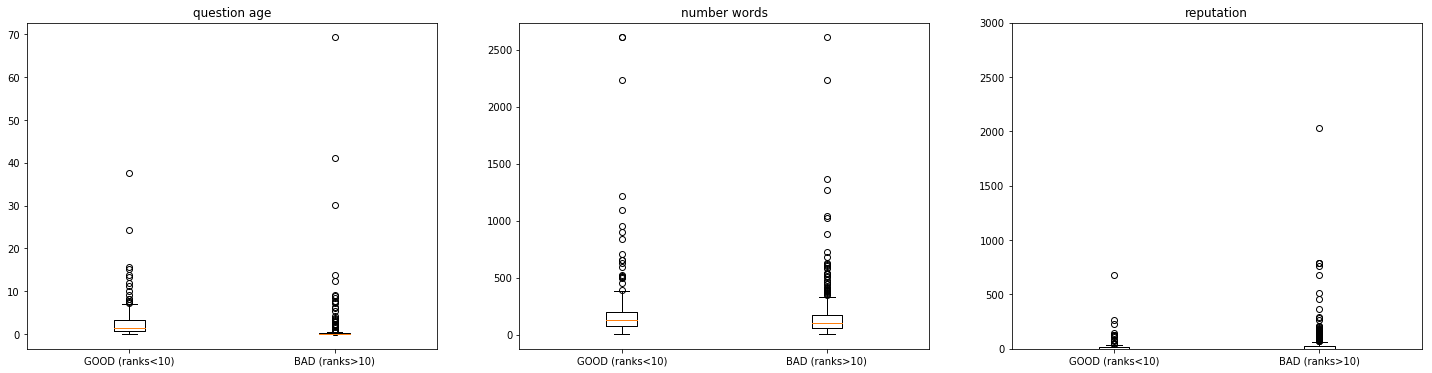

In [35]:
num_plots = 3
plt.figure(figsize=(25,6))
plt.subplot(1,num_plots,1)
plt.boxplot([data_good["questionage"], data_bad["questionage"]])
plt.xticks([1, 2], ['GOOD (ranks<10)', 'BAD (ranks>10)'])
plt.title("question age")
plt.subplot(1,num_plots,2)
plt.boxplot([data_good["num_words"], data_bad["num_words"]])
plt.xticks([1, 2], ['GOOD (ranks<10)', 'BAD (ranks>10)'])
plt.title("number words")
plt.subplot(1,num_plots,3)
plt.boxplot([data_good["reputation"], data_bad["reputation"]])
plt.xticks([1, 2], ['GOOD (ranks<10)', 'BAD (ranks>10)'])
plt.ylim(0,3000)
plt.title("reputation")
plt.show()

In [26]:
for col in data.columns:
    print(col, np.mean(data_good[col])/np.mean(data_bad[col]))

id 0.9973746397384262
questionage 4.174448139785348
label 1.0
decision_time 0.9125111099127333
num_words 1.6340188058561242
num_hyperlinks 0.8258776017396708
GunningFogIndex 1.0689855314153214
LIX 1.0602882524861408
cumulative_term_entropy 1.0974684550455927
number_posts 1.0309998460591132
num_questions 1.2178316950122223
number_answers 0.7632910193255021
accepted_answers 0.7097514554411105
accumulated_score_x 1.1194893264570567
accumulated_score_y 0.5263030019437046
num_solved_questions 1.0413167768447382
reputation 3.6135718690213445
number_posts_u 0.947997147272079
num_questions_u 0.8186369941352543
number_answers_u 0.9176382240070777
accepted_answers_u 0.8726668596282621
accumulated_score_x_u 0.7778800454502878
accumulated_score_y_u 0.9137146727315294
num_solved_questions_u 1.018163378203946
reputation_u 1.1988458814750669
topic_affinity_user 1.1773662110183671
topic_affinity_asker 0.45446135291802514
topic_reputation_user 0.5036945812807881
topic_reputation_asker 0.881465517241379